In [2]:
from google.colab import drive 
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/WNS")
!ls

Test  Train


In [4]:
import pandas as pd
train_data=pd.read_csv("Train//train.csv")
train_item=pd.read_csv("Train/item_data.csv")
train_view=pd.read_csv("Train/view_log.csv")
print (train_data.columns)
print (train_item.columns)
print (train_view.columns)
print (train_data.shape)
print (train_view.shape)
print (train_item.shape)

Index(['impression_id', 'impression_time', 'user_id', 'app_code', 'os_version',
       'is_4G', 'is_click'],
      dtype='object')
Index(['item_id', 'item_price', 'category_1', 'category_2', 'category_3',
       'product_type'],
      dtype='object')
Index(['server_time', 'device_type', 'session_id', 'user_id', 'item_id'], dtype='object')
(237609, 7)
(3118622, 5)
(132761, 6)


In [5]:
test=pd.read_csv("Test/test.csv")
test.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0


In [6]:
train_data.head(1)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0


In [7]:
train_view.head(1)

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970


In [9]:
train_item.head(1)

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040


In [10]:
train=pd.merge(train_data,train_view,how="inner",on="user_id")
print (train.shape)
train.head(2)

(11052882, 11)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-10-19 18:11:00,android,190710,43886
1,621bf66ddb7c962aa0d22ac97d69b793,2018-11-15 00:19:00,87862,422,old,0,0,2018-10-19 18:11:00,android,190710,43886


In [11]:
train_mod=pd.merge(train,train_item,how="inner",on="item_id")
print (train.shape)
train.head(2)

(11052882, 11)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-10-19 18:11:00,android,190710,43886
1,621bf66ddb7c962aa0d22ac97d69b793,2018-11-15 00:19:00,87862,422,old,0,0,2018-10-19 18:11:00,android,190710,43886


In [12]:
#train_mod.isnull().sum()
train_mod.corr()

,user_id,app_code,is_4G,is_click,session_id,item_id,item_price,category_1,category_2,category_3,product_type
user_id,1.000000,-0.009178,-0.005478,-0.007120,0.003364,0.003610,-0.002909,-0.001545,0.004517,0.006544,-0.000448
app_code,-0.009178,1.000000,-0.079413,-0.012416,-0.005516,0.001898,0.000907,0.001095,0.001951,0.003034,0.000484
is_4G,-0.005478,-0.079413,1.000000,-0.005480,0.001379,-0.001197,-0.000703,-0.004572,0.001457,-0.002690,-0.003992
is_click,-0.007120,-0.012416,-0.005480,1.000000,0.000688,-0.000237,-0.001110,0.000429,0.001230,0.000149,0.000171
session_id,0.003364,-0.005516,0.001379,0.000688,1.000000,-0.000801,0.001991,-0.002265,-0.001500,0.001012,0.002088
item_id,0.003610,0.001898,-0.001197,-0.000237,-0.000801,1.000000,0.002099,0.009923,-0.045144,0.023123,0.000635
item_price,-0.002909,0.000907,-0.000703,-0.001110,0.001991,0.002099,1.000000,-0.213289,-0.124804,0.015686,0.019338
category_1,-0.001545,0.001095,-0.004572,0.000429,-0.002265,0.009923,-0.213289,1.000000,0.040332,0.043156,-0.031106
category_2,0.004517,0.001951,0.001457,0.001230,-0.001500,-0.045144,-0.124804,0.040332,1.000000,0.069050,-0.028621
category_3,0.006544,0.003034,-0.002690,0.000149,0.001012,0.023123,0.015686,0.043156,0.069050,1.000000,-0.019653


In [13]:
train_modi=train_mod.drop(["impression_id"],axis=1)
print (train_modi.shape)
train_modi.head(2)

(11046039, 15)


,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-11-15 00:00:00,87862,422,old,0,0,2018-10-19 18:11:00,android,190710,43886,2350,11,35,20,5622
1,2018-11-15 00:19:00,87862,422,old,0,0,2018-10-19 18:11:00,android,190710,43886,2350,11,35,20,5622


In [0]:
def epoc(timestring):
  import time
  from calendar import timegm
  utc_time = time.strptime("2009-03-08T00:27:31.807Z", "%Y-%m-%dT%H:%M:%S.%fZ")
  epoch_time = timegm(utc_time)
  return epoch_time
  
#epoc(x)

In [15]:
train_modi['impression_time']=train_modi['impression_time'].apply(epoc)
train_modi.head(1)

,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,1236472051,87862,422,old,0,0,2018-10-19 18:11:00,android,190710,43886,2350,11,35,20,5622


In [16]:
train_modi['server_time']=train_modi['server_time'].apply(epoc)
train_modi.head(1)

,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,1236472051,87862,422,old,0,0,1236472051,android,190710,43886,2350,11,35,20,5622


In [18]:
print (train_modi.os_version.value_counts())

latest          5780240
intermediate    2833431
old             2432368
Name: os_version, dtype: int64


In [19]:
print (train_modi.is_click.value_counts())

0    10384853
1      661186
Name: is_click, dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le1=LabelEncoder()
train_modi["os_version"]=le.fit_transform(train_modi["os_version"])
train_modi["device_type"]=le.fit_transform(train_modi["device_type"])
train_modi.head(1)

,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,1236472051,87862,422,2,0,0,1236472051,0,190710,43886,2350,11,35,20,5622


In [21]:
X=train_modi.iloc[:,train_modi.columns!='is_click']
Y=train_modi['is_click']
print (X.shape)
Y.shape

(11046039, 14)


(11046039,)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_array=sc.fit_transform(X)
train_new=pd.DataFrame(train_array,columns=X.columns)
train_new.head(2)

,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,0.0,1.541313,1.27745,1.503009,-0.668205,0.0,-0.01618,-1.130704,-0.581656,-0.333809,0.312687,-0.177549,-1.578991,0.117195
1,0.0,1.541313,1.27745,1.503009,-0.668205,0.0,-0.01618,-1.130704,-0.581656,-0.333809,0.312687,-0.177549,-1.578991,0.117195


In [23]:
#splitting the data into Train Test
#X=train_new.iloc[:,train_new.columns!='is_click']
#Y=train_new['is_click']
#print (X.shape)
#Y.shape

train_new=train_new.sample(2500000)
Y=Y.sample(2500000)
Y.shape

(2500000,)

In [24]:
Y.value_counts()
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(train_new,Y)
print (sum(y_train_res==0))
print (sum(y_train_res==1))
#sum(y_train==1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


2350347
2350347


In [25]:
#print (1880828*2)
x_train_res.shape

(4700694, 14)

In [26]:
## Splitting Test Train data
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(train_new,Y,test_size=0.25)
x_train,x_test,y_train,y_test=train_test_split(x_train_res,y_train_res,test_size=0.25)
y_train.shape

(3525520,)

In [27]:
y_train_res

array([0, 0, 1, ..., 1, 1, 1])

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

0.7522375409939294
[[475980 111104]
 [180060 408030]]
F1 Score: 0.737032 
AUC: 0.75


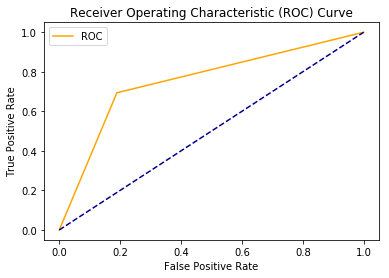

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
pred_xg=xg.predict(x_test)
print (accuracy_score(y_test,pred_xg))
print (confusion_matrix(y_test,pred_xg))
print ("F1 Score: %f " % f1_score(y_test,pred_xg))    
auc = roc_auc_score(y_test, pred_xg)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, pred_xg)
plot_roc_curve(fpr, tpr)

In [0]:
#xg

0.9181397818535808
[[547354  39730]
 [ 56470 531620]]
F1 Score: 0.917029 
AUC: 0.92


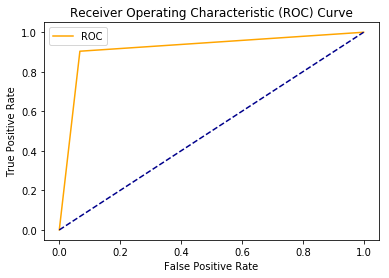

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))
print ("F1 Score: %f " % f1_score(y_test,pred))    
auc = roc_auc_score(y_test,pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test,pred)
plot_roc_curve(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5048777126054795
[[263489 324253]
 [257687 329917]]
0.531364000212599
F1 Score: 0.531364 
AUC: 0.50


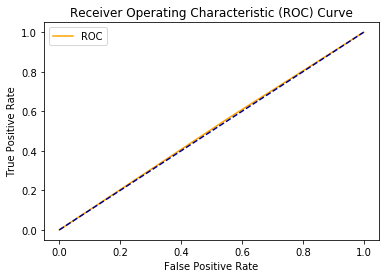

In [35]:
##Logistic Regression
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)
y_pred_lr = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
print (acc_lr)
print (confusion_matrix(y_test,y_pred_lr))
print (f1_score(y_test, y_pred_lr))
print ("F1 Score: %f " % f1_score(y_test,y_pred_lr))    
auc = roc_auc_score(y_test,y_pred_lr)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_lr)
plot_roc_curve(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Score:  0.6057528502162233
F1 score is: 0.6349514761998186
AUC: 0.61


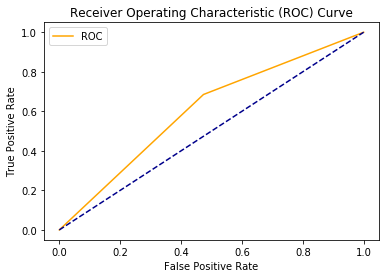

In [30]:
from sklearn.neural_network import MLPClassifier
ml = MLPClassifier(hidden_layer_sizes=(100, 100, 100,))
ml.fit(x_train, y_train)
print("Score: ", ml.score(x_test, y_test))
y_pred_ml= ml.predict(x_test)
#y_pred_proba = ml.predict_proba(x_test,y_pred_ml)
print("F1 score is: {}".format(f1_score(y_test, y_pred_ml)))
auc = roc_auc_score(y_test,y_pred_ml)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_ml)
plot_roc_curve(fpr, tpr)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc4=RandomForestClassifier(n_estimators=400)
rfc4.fit(x_train,y_train)
pred4=rfc4.predict(x_test)
print (accuracy_score(y_test,pred4))
print (confusion_matrix(y_test,pred4))
print("F1 score is: {}".format(f1_score(y_test, pred4)))
auc = roc_auc_score(y_test,pred4)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test,pred4)
plot_roc_curve(fpr, tpr)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc3=RandomForestClassifier(n_estimators=300)
rfc3.fit(x_train,y_train)
pred3=rfc3.predict(x_test)
print (accuracy_score(y_test,pred3))
print (confusion_matrix(y_test,pred3))
print("F1 score is: {}".format(f1_score(y_test, pred3)))
auc = roc_auc_score(y_test,pred3)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test,pred3)
plot_roc_curve(fpr, tpr)

In [0]:
########Model on Test Data

In [33]:
########Test

test=pd.read_csv("Test/test.csv")
test.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0


In [34]:
test_mod=pd.merge(test,train_view,how="inner",on="user_id")
print (test_mod.shape)
test_mod.head(2)-

(3871697, 10)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1,2018-12-11 19:01:00,android,923045,128995
1,30e58abb328b85fd43398973f4daa190,2018-12-14 00:02:00,44754,127,latest,0,2018-12-11 19:01:00,android,923045,128995


In [35]:
test_mod_la=pd.merge(test_mod,train_item,how="inner",on="item_id")
print (test_mod_la.shape)
test_mod_la.head(2)

(3869280, 15)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1,2018-12-11 19:01:00,android,923045,128995,23424,1,42,220,1617
1,30e58abb328b85fd43398973f4daa190,2018-12-14 00:02:00,44754,127,latest,0,2018-12-11 19:01:00,android,923045,128995,23424,1,42,220,1617


In [36]:
test_modi=test_mod_la.drop(["impression_id"],axis=1)
print (test_modi.shape)
test_modi.head(2)

(3869280, 14)


,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-12-13 07:44:00,44754,127,latest,1,2018-12-11 19:01:00,android,923045,128995,23424,1,42,220,1617
1,2018-12-14 00:02:00,44754,127,latest,0,2018-12-11 19:01:00,android,923045,128995,23424,1,42,220,1617


In [37]:
test_modi['impression_time']=test_modi['impression_time'].apply(epoc)
test_modi.head(1)

,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,1236472051,44754,127,latest,1,2018-12-11 19:01:00,android,923045,128995,23424,1,42,220,1617


In [38]:
test_modi['server_time']=test_modi['server_time'].apply(epoc)
test_modi.head(1)

,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,1236472051,44754,127,latest,1,1236472051,android,923045,128995,23424,1,42,220,1617


In [39]:
from sklearn.preprocessing import LabelEncoder
let=LabelEncoder()
let1=LabelEncoder()
test_modi["os_version"]=let.fit_transform(test_modi["os_version"])
test_modi["device_type"]=let1.fit_transform(test_modi["device_type"])
test_modi.head(1)

,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,1236472051,44754,127,1,1,1236472051,0,923045,128995,23424,1,42,220,1617


In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_array=sc.fit_transform(test_modi)
test_new=pd.DataFrame(test_array,columns=test_modi.columns)
#train_new_y=pd.DataFrame(y_train_res,columns='is_click')
print (test_new.shape)
#print (x_train_res.shape)
test_new.head(2)

(3869280, 14)


,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,0.0,-0.058129,-0.978058,0.044116,1.488230,0.0,-0.019795,1.200531,1.644904,0.524157,-1.594926,0.142189,0.530173,-1.205222
1,0.0,-0.058129,-0.978058,0.044116,-0.671939,0.0,-0.019795,1.200531,1.644904,0.524157,-1.594926,0.142189,0.530173,-1.205222


In [45]:
#print (new_mod_test.shape)
test_pred=dt.predict(test_new)
submission=pd.DataFrame(test_pred)
#submission.insert(0,'unique_hash',test_data["unique_hash"])
submission.columns=["is_click"]
submission.insert(0,'impression_id',test['impression_id'])
submission=submission.round(0)
submission.head()

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,1
1,caac14a5bf2ba283db7708bb34855760,1
2,13f10ba306a19ce7bec2f3cae507b698,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,1
4,bf5a572cca75f5fc67f4b14e58b11d70,1


In [0]:
submission.to_csv('sample_submission.csv',index=False)